# Decision Tree Classification

## Importación de librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importación del dataset

In [ ]:
dataset = pd.read_csv('./Datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values # Variables independientes
y = dataset.iloc[:, -1].values # Variable dependiente (la que queremos predecir)

## División del dataset en conjunto de entrenamiento y conjunto de testing

In [ ]:
from sklearn.model_selection import train_test_split # Importamos la librería para dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) # Dividimos el dataset en entrenamiento y test (75% y 25% respectivamente)

## Escalado de variables

In [ ]:
from sklearn.preprocessing import StandardScaler # Importamos la librería para escalar las variables independientes
sc = StandardScaler() # Creamos el objeto para escalar las variables
X_train = sc.fit_transform(X_train) # Escalamos las variables de entrenamiento
X_test = sc.transform(X_test) # Escalamos las variables de test

## Entrenamiento del modelo de Árbol de Decisión con el conjunto de entrenamiento

criterion{“gini”, “entropy”}, default=”gini”

La función para medir la calidad de una división. Los criterios admitidos son "gini" para la impureza de Gini y "entropía" para la ganancia de información.

In [ ]:
# api: sklearn.tree.DecisionTreeClassifier¶
from sklearn.tree import DecisionTreeClassifier # Importar la clase DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=4) # Crear un clasificador de árbol de decisión con criterio de entropía.
classifier.fit(X_train, y_train) # Entrene el modelo de clasificación de árbol de decisión en el conjunto de entrenamiento.

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

## prediccion de un nuevo resultado con el modelo de Árbol de Decisión

In [ ]:
print(classifier.predict(sc.transform([[30,87000]]))) # Predecir si un cliente de 30 años con salario de 87000 comprará o no el producto

[0]


## Predicción de los resultados con el conjunto de prueba

In [ ]:
y_pred = classifier.predict(X_test) # predicciones de los datos de prueba X_test con el modelo entrenado
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # concatenamos los vectores y_pred y y_test en un solo vector para compararlos

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 4 28]]


0.93

## Visualización de los resultados en el Conjunto de Entrenamiento

C:\Users\Mario_Suaza\AppData\Local\Temp\ipykernel_22732\418396241.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j) # se grafican los puntos de entrenamiento


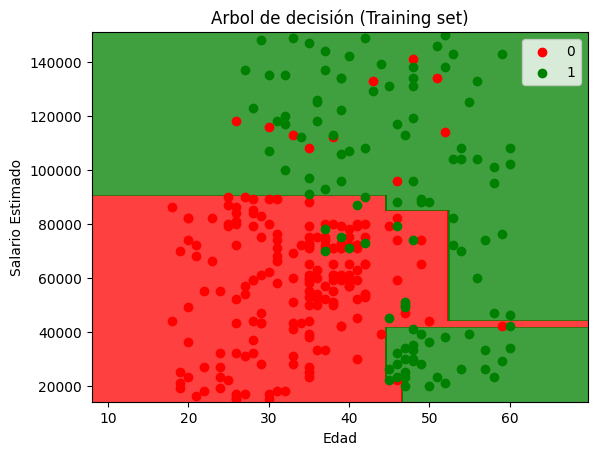

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train # se invierte la transformacion de los datos de entrenamiento para poder graficarlos en su escala original y
                                                        #no en la escala normalizada que se utilizo para el entrenamiento del modelo

#Meshgrid es una función de Matplotlib que se utiliza para crear una cuadrícula de puntos.
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25), # se crea una malla de puntos para graficar el modelo
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25)) # se crea una malla de puntos para graficar el modelo

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green'))) # se grafica el modelo de clasificacion en la malla de puntos creada anteriormente y se
                                                                    #colorea de acuerdo a la prediccion del modelo para cada punto de la malla de puntos creada

plt.xlim(X1.min(), X1.max()) # se establecen los limites de los ejes x e y de la grafica

plt.ylim(X2.min(), X2.max()) # se establecen los limites de los ejes x e y de la grafica

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j) # se grafican los puntos de entrenamiento

plt.title('Arbol de decisión (Training set)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

## Visualización de los resultados en el Conjunto de prueba

C:\Users\Mario_Suaza\AppData\Local\Temp\ipykernel_22732\2231607385.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j) # se grafican los puntos de la matriz de test


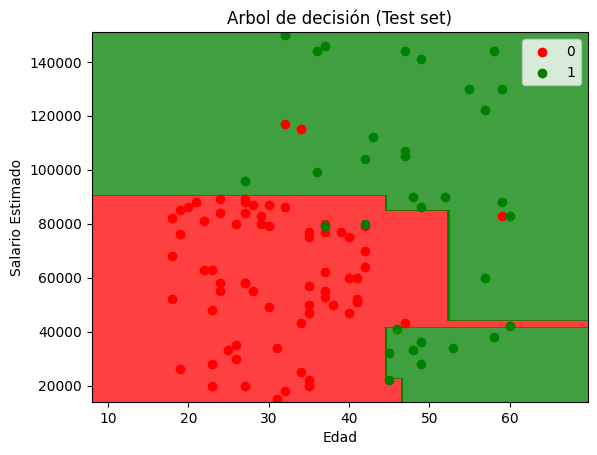

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test # se vuelve a la escala original para poder graficar los puntos de la matriz de test y su predicción
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25)) # se crea una matriz de puntos con los valores de edad y salario estimado
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), # se predice la matriz de puntos  y se colorea
             alpha = 0.75, cmap = ListedColormap(('red', 'green'))) # se colorea la matriz de puntos
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j) # se grafican los puntos de la matriz de test
plt.title('Arbol de decisión (Test set)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

## Visualización del Árbol de Decisión

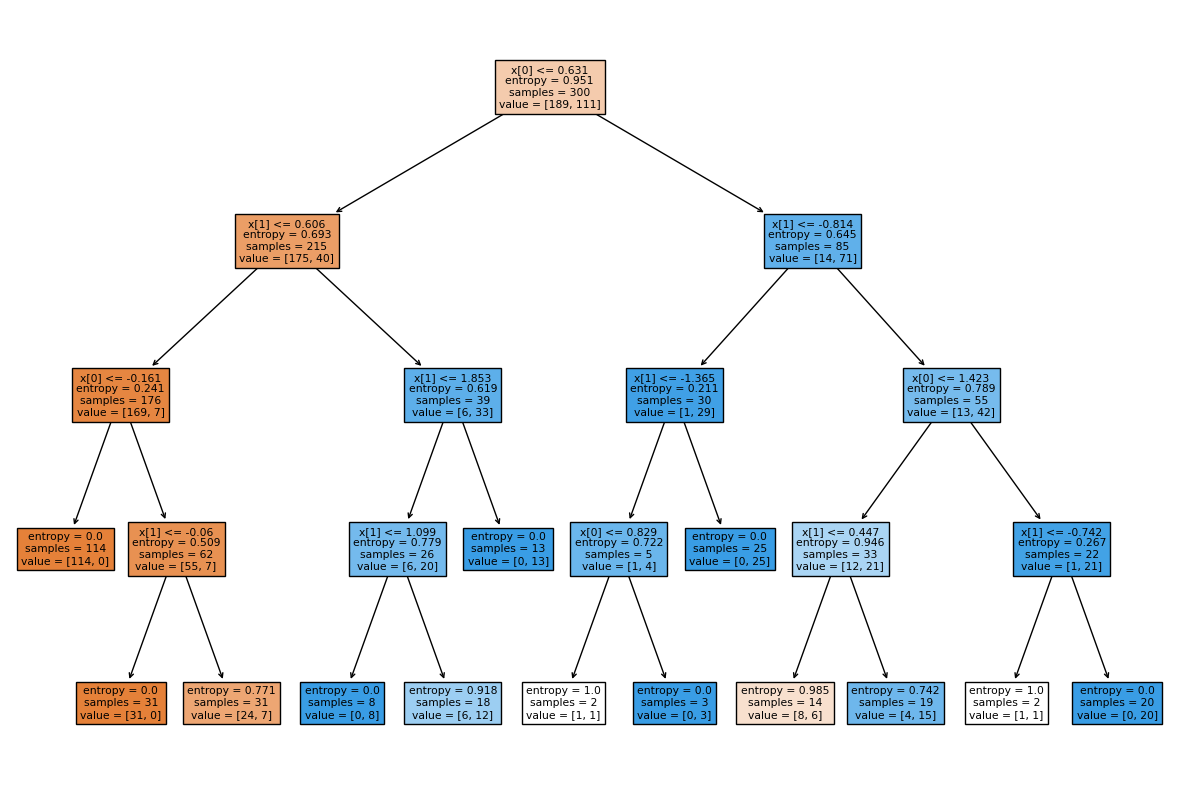

: 

In [ ]:
# graficar el arbol de decision
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled=True)
plt.show()